In [26]:
import matplotlib.pyplot as plt #General Plotting
from matplotlib import cm
import numpy as np
from scipy.stats import multivariate_normal

# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(4)



Text(0.5, 0.92, 'True Labels')

<Figure size 432x288 with 0 Axes>

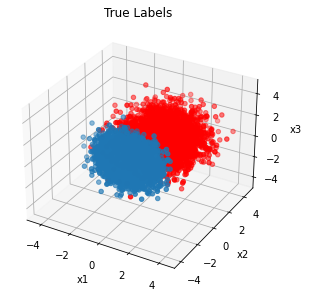

In [49]:
# Generate Dataset
# Number of samples
N = 10000

# Class Priors
p0 = 0.65 # P(L=0)
p1 = 0.35 # P(L=1)

# Generate data distributions and store in true class labels
N0=0
N1=0
for i in range(0,N):
    if np.random.random() < p0:
        N0 = N0 + 1
    else:
        N1 = N1 + 1

# mu and sigma values for N0
mu0 = np.array([-1/2, -1/2, -1/2])
sigma0 = np.array([[1,-0.5,0.3],[-0.5,1,-0.5],[0.3, -0.5, 1]])
# mu and sigma values for the data distribution 1
mu1 = np.transpose(np.array([1, 1, 1]))
sigma1 = np.array([[1, 0.3, -0.2],[0.3, 1, 0.3],[-0.2, 0.3, 1]])

# generates data from both distributions
r0 = np.random.multivariate_normal(mu0,sigma0,N0)
r1 = np.random.multivariate_normal(mu1, sigma1, N1)

# Make a scatter plot
plt.clf()
fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(131, projection = '3d')

ax1.scatter(r0[:,0],r0[:,1],r0[:,2])
ax1.scatter(r1[:,0],r1[:,1],r1[:,2],c='r')

ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("x3")
ax1.set_title('True Labels')

In [ ]:
N = 10000
mu = np.array([[-1/2, -1/2, -1/2], [1, 1, 1]])

sigma = np.array([[[1, 0.3, -0.2],
                   [0.3, 1, 0.3],
                   [-0.2, 0.3, 1]],
                  [[1, 0.3, -0.2],
                   [0.3, 1, 0.3],
                   [-0.2, 0.3, 1]]])
                  
priors = np.array([0.65, 0.35])


n = mu.shape[1]
C = len(priors)

print(C)
print(n)

# Decide randomly which samples will come from each component
# np.random.rand creates an array of the given shape and populates it with random
# samples from a uniform distribution over [0,1). Similar to np.zeros or np.ones
u = np.random.rand(N)
print(u.shape)

# set thresholds: 0 -> 0.65 -> 1
thresholds = np.cumsum(priors)
thresholds = np.insert(thresholds,0,0)

# create empty matrix for samples of size 10,000 x 3
X = np.zeros([N,n])

# create empty labels array of length 10,000
labels = np.zeros(N)

# Plot for original data and their true labels
fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(131, projection = '3d')
marker_shapes = 'd+.'
marker_colors = 'rbg' 

for i in range(C):

    # Find indices of u that meet each prior
    indices = np.argwhere((thresholds[i] <= u) & (u <= thresholds[i+1]))[:, 0]
    print(indices)

    # Get the number of indices in each component - should be ~ 6500 and 3500
    Nl = len(indices)
    
    # set label vector based on above - will be vector of class labels [0 0 1 0 1 .. to 9999] in this case
    # for more classes, this can be [1 2 2 0 1 3 1 3 0 ...]
    labels[indices] = i * np.ones(Nl)
    
    # for each valid index, fill the 
    X[indices, :] = multivariate_normal.rvs(mu[i], sigma[i], Nl)
    ax1.plot(X[labels==i, 0], X[labels==i, 1], X[labels==i, 2], marker_shapes[i] + marker_colors[i], label="True Class {}".format(i))


# Plot the original data and their true labels
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title("Generated Original Data Samples")
plt.tight_layout()
plt.show()






PartA
Experimental Gamma 
1.8453013865130947
Experimental min_error 
0.05787151570787005
Theor eti cal Eror 
0.05826969545758562


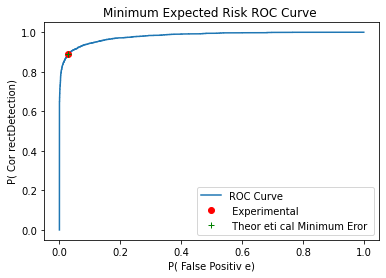

In [15]:
# PART A

# Define Discriminators 
N0_discriminant = []
N1_discriminant = []

# Discriminant scores for all datapoints in each distribution (number of 'hits') using
# multivariate Gaussian probability density function
for j in range(0, N0):
    N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma1)/multivariate_normal.pdf(r0[j], mu0, sigma0))
for j in range(0, N1):
    N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma1)/multivariate_normal.pdf(r1[j], mu0, sigma0)) # CUT OFF
    
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]

# concatenate
full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)

# sweep gamma/threshold value and compute true positive (detected) and false positive (false alarm)
# Instead of testing values from 0 - infty, we test between 
# across the two discriminants core lists (plus a 0 value), so in each loop one new value ...
# begin >= 0 and are eventually <= the maximum value
for i in sorted(full_discriminant):
    fp = len([ j for j in N0_discriminant if j >=i ])/ N0
    tp = len([ j for j in N1_discriminant if j >=i ])/ N1
    false_positive.append(fp)
    true_positive.append(tp)    
    gamma_values.append(i)
    prob_error.append(fp *p0 + (1 - tp)* p1)

# Find experimental minimum error and corresponding index
minimum_error = min(prob_error)
minimum_index = 0
for i in range(0, len(prob_error)):
    if prob_error [i] == minimum_error:
        minimum_index = i
        break

print('PartA')
print('Experimental Gamma ')
print(gamma_values[minimum_index])
print('Experimental min_error ')
print (minimum_error)

# Calculate Theoretical Minimum error
theo_fp = len([ j for j in N0_discriminant if j >=(p0/p1) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p0/p1) ])/ N1
print('Theor eti cal Eror ')
print(theo_fp *p0 + (1- theo_tp)* p1)

# plot with two additional datapoints ???
plt.figure(1)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum_index],true_positive [minimum_index], 'ro',label= ' Experimental' )
plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Minimum Expected Risk ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()



PartB 
Experimental Gamma 
2.534269785427277
Experimental min_error 
0.06082066716776886
Theor eti cal Eror 
0.07601067895139096


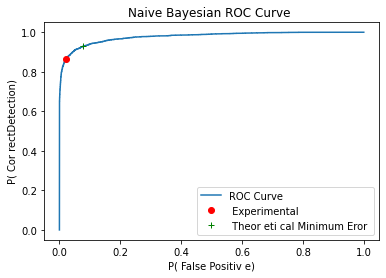

In [40]:
# Part B
# Set sigma to identity matrix
sigma_nb = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1] ])
N0_discriminant = []
N1_discriminant = []

# Calculate discriminant score as above
for j in range(0, N0):
    N0_discriminant.append(multivariate_normal.pdf(r0[j], mu1, sigma_nb)/multivariate_normal.pdf(r0[j], mu0, sigma0))
for j in range(0, N1):
    N1_discriminant.append(multivariate_normal.pdf(r1[j], mu1, sigma_nb)/multivariate_normal.pdf(r1[j], mu0, sigma0))

false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]

full_discriminant= N0_discriminant + N1_discriminant
full_discriminant.append(0)
# deciding for all possible gammas using the same logic as part A
for i in sorted(full_discriminant):
    fp = len([ j for j in N0_discriminant if j >=i ])/ N0
    tp = len([ j for j in N1_discriminant if j >=i ])/ N1
    false_positive.append(fp)
    true_positive.append(tp)
    gamma_values.append(i)
    prob_error.append(fp *p0 + (1 - tp)* p1)

# minimum_error = min( prob_error)
# minimum_index = 0
# for i in range(0, len(prob_error)) :
#     if prob_error [i] == minimum_error :
#         minimum_index = i
#         break

print('PartB ')
print('Experimental Gamma ')
print(gamma_values [minimum_index ])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in N0_discriminant if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in N1_discriminant if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)

# Plot
plt.figure(2)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive[minimum_index],true_positive[minimum_index], 'ro',label= ' Experimental ')
plt.plot(theo_fp, theo_tp, 'g+ ',label= ' Theor eti cal Minimum Eror ')
plt.title('Naive Bayesian ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()

PartC
Experimental Gamma 
0.4207622779803293
Experimental min_error 
0.08040124471286952
Theor eti cal Eror 
0.08077100237067185


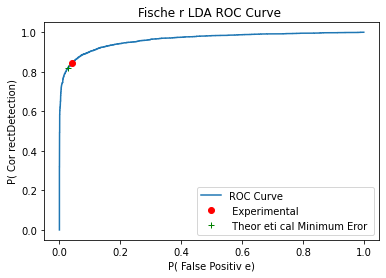

In [13]:


# Part C
# Simple Function to get average of a list
def get_average(list):
    return sum( list)/ len(list)

# calculate mu projections
mu0proj = np.transpose(np.array([get_average(r0[:, 0]), get_average(r0[:, 1]), get_average(r0[:, 2])]))
mu1proj = np.transpose(np.array([get_average(r1[:, 0]), get_average(r1[:, 1]), get_average(r1[:, 2])]))# calculate covaria nceproj e ction s
sigma0proj = np.cov(r0, rowvar=False)
sigma1proj = np.cov(r1, rowvar=False)

# calculate between scatter and within scatter
Sb = (mu0proj - mu1proj)* np.transpose (mu0proj - mu1proj)
Sw = sigma0proj + sigma1proj

# get eigenvectors and eigenvalues from Sw^-1 * Sb
w, v = np.linalg.eig(np.linalg.inv(Sw) * Sb)
max_eigen_index = 0

# find index of maximum eigenvalue
for i in range(0, len (w)):
    if w[i] == max(w) :
        max_eigen_index = i


# assign wLDA to correct eigenvector and calculate LDA for 2 distributions
# Note : for some r eason numpy hasb othth e wLDA andth e d ataal r ead ytranspos e dsothis fix # formul a
wLDA = v[:, max_eigen_index]
yLDA0 = np.matmul(wLDA, r0.T)
yLDA1 = np.matmul(wLDA, r1.T)
totalLDA = list(yLDA0) + list(yLDA1)
false_positive =[]
true_positive =[]
prob_error =[]
gamma_values =[]
# us e same logic asa bov eto make d e cisio n s
for i in sorted(totalLDA):
    fp = len([ j for j in yLDA0 if j >=i ])/ N0
    tp = len([ j for j in yLDA1 if j >=i ])/ N1
    false_positive.append(fp)
    true_positive.append(tp)
    gamma_values.append(i)
    prob_error.append(fp *p0 + (1 - tp)* p1)

minimum_error = min( prob_error)
minimum_index = 0
for i in range(0, len(prob_error)) :
    if prob_error [i] == minimum_error :
        minimum_index = i
        break

print('PartC')
print('Experimental Gamma ')
print(gamma_values[minimum_index])
print('Experimental min_error ')
print (min( prob_error))
print('Theor eti cal Eror ')
theo_fp = len([ j for j in yLDA0 if j >=(p1/p0) ])/ N0
theo_tp = len([ j for j in yLDA1 if j >=(p1/p0) ])/ N1
print(theo_fp *p0 + (1- theo_tp)* p1)

# plotd ata
plt.figure(3)
plt.plot(false_positive,true_positive,label= 'ROC Curve ')
plt.plot(false_positive [minimum_index],true_positive [minimum_index], 'ro',label= ' Experimental ')
plt.plot(theo_fp, theo_tp, 'g+',label= ' Theor eti cal Minimum Eror ')
plt.title('Fische r LDA ROC Curve ')
plt.ylabel('P( Cor rectDetection)')
plt.xlabel('P( False Positiv e)')
plt.legend()
plt.show()